# QuarentenaDados - Alura

### Aula 1 - Analisando dados de filmes. Dataset obtido em: https://grouplens.org/datasets/movielens/

In [234]:
import pandas as pd

In [235]:
#Lendo csv de filmes
filmes = pd.read_csv(r"C:\Users\LemosM02\Desktop\Estudos\Quarentenadados\ml-latest-small\movies.csv")

In [236]:
#Renomeando colunas
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [237]:
filmes.shape

(9742, 3)

In [238]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
filmeId    9742 non-null int64
titulo     9742 non-null object
generos    9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [239]:
#Lendo csv de avaliações
avaliacoes = pd.read_csv(r"C:\Users\LemosM02\Desktop\Estudos\Quarentenadados\ml-latest-small\ratings.csv")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [240]:
avaliacoes.shape

(100836, 4)

In [241]:
#Alterando o nome das colunas
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "dataregistro"]
avaliacoes.head()

,usuarioId,filmeId,nota,dataregistro
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [242]:
#Analisando o filme 1
avaliacoes_do_filme_1 = avaliacoes.query("filmeId==1")
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,dataregistro
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [243]:
avaliacoes_do_filme_1.describe()

,usuarioId,filmeId,nota,dataregistro
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [244]:
avaliacoes.describe()

,usuarioId,filmeId,nota,dataregistro
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [245]:
avaliacoes["nota"].mean()

3.501556983616962

In [246]:
avaliacoes_do_filme_1["nota"].mean()

3.9209302325581397

In [247]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [248]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [249]:
filmes_com_media.sort_values("nota", ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


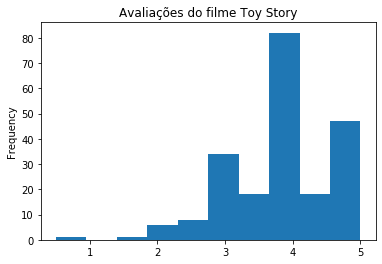

In [250]:
import matplotlib.pyplot as plt

avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

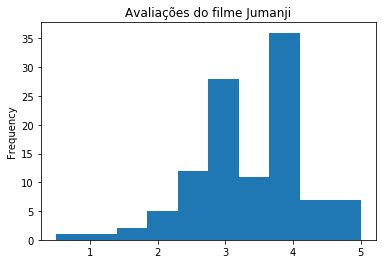

In [251]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist',
                                              title="Avaliações do filme Jumanji")

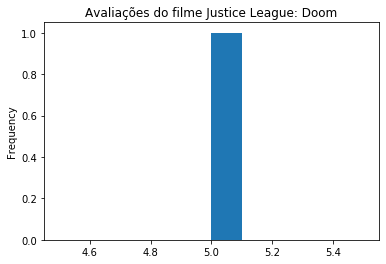

In [252]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind='hist',
                                                   title="Avaliações do filme Justice League: Doom")

### Desafio 1 - Determine quantos filmes não tem avaliações e quais são esses filmes.

In [253]:
#Verificando quais colunas possuem valores nulos/brancos
filmes_com_media.isna().sum()

filmeId     0
titulo      0
generos     0
nota       18
dtype: int64

In [254]:
#Localizando as 18 notas com NaN e quais são os filmes
filmes_com_media.query("nota != nota")

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


### Desafio 2 - Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [255]:
filmes_com_media.rename(columns={"nota": "nota_média"},inplace = True)

In [256]:
filmes_com_media.head()

,filmeId,titulo,generos,nota_média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


### Desafio 3 - Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [257]:
#Criando a coluna count com as avaliações por filme
count = avaliacoes.groupby(["filmeId"])["filmeId"].count().reset_index(name="total_votos")
count.head()

,filmeId,total_votos
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49


In [258]:
#Dando um merge nos dfs
filmes_final = filmes_com_media.merge(count, on="filmeId")

In [259]:
filmes_final.head()

,filmeId,titulo,generos,nota_média,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49


### Desafio 4 - Arredondar as médias (coluna de nota média) para duas casas decimais.

In [260]:
filmes_final = filmes_final.round({'nota_média': 2})

In [261]:
filmes_final.head()

,filmeId,titulo,generos,nota_média,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7
4,5,Father of the Bride Part II (1995),Comedy,3.07,49


### Desafio 5 - Descobrir os generos dos filmes (quais são eles, únicos).

In [262]:
#Como temos mais de um genero por filme em alguns casos, precisamos quebrar essa coluna. 
#Primeiro um split na coluna para criar uma lista de generos
generos = filmes_final['generos'].str.split("|").tolist()

In [263]:
#O resultado é uma lista de listas, então precisamos retirar todos os itens de todas as listas.
lista_gerenos = []
for i in generos:
    lista_gerenos.extend(i)

In [264]:
#E set para retirar valores duplicados.
set(lista_generos)

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 None,
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

### Desafio 6 - Contar o número de aparições de cada genero.

In [265]:
#Importando collections, que possui uma função que resolve esse desafio
from collections import Counter

In [266]:
dict_generos = Counter(lista_generos)

In [267]:
dict_generos

Counter({None: 9724,
         'Adventure': 2524,
         'Animation': 1220,
         'Children': 1328,
         'Comedy': 7506,
         'Fantasy': 1556,
         'Romance': 3182,
         'Drama': 8698,
         'Action': 3656,
         'Crime': 2392,
         'Thriller': 3778,
         'Horror': 1954,
         'Mystery': 1146,
         'Sci-Fi': 1960,
         'War': 762,
         'Musical': 666,
         'Documentary': 876,
         'IMAX': 316,
         'Western': 334,
         'Film-Noir': 170,
         '(no genres listed)': 68})

### Desafio 7 - Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

In [277]:
#Passar o resultado do Counter para um formato que podemos usar no plot (dataframe)
df_generos = pd.DataFrame.from_dict(dict_generos, orient='index').reset_index()
df_generos.columns = ["genero", "quantidade"]

In [278]:
df_generos

,genero,quantidade
0,None,9724
1,Adventure,2524
2,Animation,1220
3,Children,1328
4,Comedy,7506
5,Fantasy,1556
6,Romance,3182
7,Drama,8698
8,Action,3656
9,Crime,2392


In [284]:
#Valores nulos devem ser tratados. Como acima vimos que já existe uma categoria (no genres listed), vamos utilizar a mesma nomenclatura.
df_generos.fillna(value="(no genres listed)", inplace=True)
df_generos = df_generos.groupby(['genero']).sum().reset_index()

In [285]:
df_generos.head()

,genero,quantidade
0,(no genres listed),9792
1,Action,3656
2,Adventure,2524
3,Animation,1220
4,Children,1328


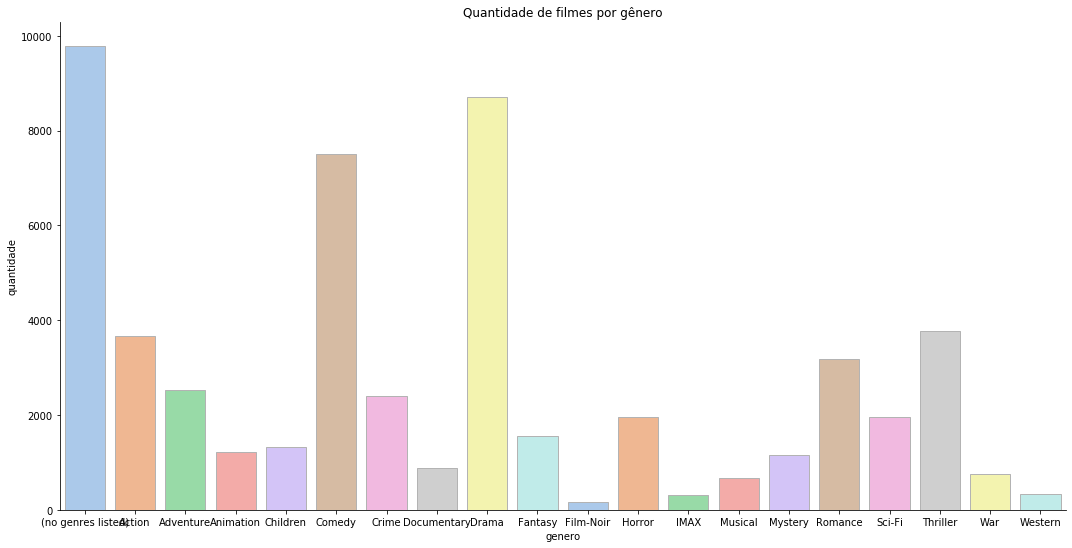

In [304]:
#Plot 
import seaborn as sns
import plotly
import plotly.express as px
import string

sns.catplot(x="genero", y="quantidade", kind = "bar", data=df_generos,ci=None,palette='pastel',edgecolor='.7',height=7.5,aspect=2)
plt.title('Quantidade de filmes por gênero')
plt.show()